In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ghibtools as gh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin
from compute_global_dataframes import resp_features_concat_job
from params import *
import physio
from configuration import base_folder, base_cmo
import os
from bibliotheque import df_baseline

In [3]:
resp =resp_features_concat_job.get(global_key).to_dataframe()

In [4]:
resp

inspi_index  expi_index  next_inspi_index  inspi_time  expi_time   
dim_0                                                                     
0             1768        2812              4587       1.768      2.812  \
1             4587        5604              7284       4.587      5.604   
2             7284        8321             10035       7.284      8.321   
3            10035       11010             12671      10.035     11.010   
4            12671       13642             15473      12.671     13.642   
...            ...         ...               ...         ...        ...   
11720       574160      576201            578363     574.160    576.201   
11721       578363      579716            583318     578.363    579.716   
11722       583318      586111            588773     583.318    586.111   
11723       588773      591399            593720     588.773    591.399   
11724       593720      596121            599139     593.720    596.121   

       next_inspi_time  cycle_duration  inspi_duration  expi_duration   
dim_0                                                                   
0                4.587           2.819           1.044          1.775  \
1                7.284           2.697           1.017          1.680   
2               10.035           2.751           1.037          1.714   
3               12.671           2.636           0.975          1.661   
4               15.473           2.802           0.971          1.831   
...                ...             ...             ...            ...   
11720          578.363           4.203           2.041          2.162   
11721          583.318           4.955           1.353          3.602   
11722          588.773           5.455           2.793          2.662   
11723          593.720           4.947           2.626          2.321   
11724          599.139           5.419           2.401          3.018   

       cycle_freq  ...  total_volume  participant   session  artifact   
dim_0              ...                                                  
0        0.354736  ...     91.345496          P01  baseline         0  \
1        0.370782  ...     98.100673          P01  baseline         0   
2        0.363504  ...    124.107899          P01  baseline         0   
3        0.379363  ...    128.582426          P01  baseline         0   
4        0.356888  ...    119.114652          P01  baseline         0   
...           ...  ...           ...          ...       ...       ...   
11720    0.237925  ...    358.299577          P31      odor         0   
11721    0.201816  ...    222.081131          P31      odor         1   
11722    0.183318  ...    515.306571          P31      odor         1   
11723    0.202143  ...    406.540359          P31      odor         0   
11724    0.184536  ...    483.129389          P31      odor         0   

       stai_state  stai_trait  Gender Maia_Mean       OAS      BMRQ  
dim_0                                                                
0              40          61       F  1.019643  2.666667  2.727273  
1              40          61       F  1.019643  2.666667  2.727273  
2              40          61       F  1.019643  2.666667  2.727273  
3              40          61       F  1.019643  2.666667  2.727273  
4              40          61       F  1.019643  2.666667  2.727273  
...           ...         ...     ...       ...       ...       ...  
11720          29          40       M  2.790774  2.933333  2.681818  
11721          29          40       M  2.790774  2.933333  2.681818  
11722          29          40       M  2.790774  2.933333  2.681818  
11723          29          40       M  2.790774  2.933333  2.681818  
11724          29          40       M  2.790774  2.933333  2.681818  

[11725 rows x 26 columns]

In [5]:
resp.columns

Index(['inspi_index', 'expi_index', 'next_inspi_index', 'inspi_time',
       'expi_time', 'next_inspi_time', 'cycle_duration', 'inspi_duration',
       'expi_duration', 'cycle_freq', 'cycle_ratio', 'inspi_volume',
       'expi_volume', 'total_amplitude', 'inspi_amplitude', 'expi_amplitude',
       'total_volume', 'participant', 'session', 'artifact', 'stai_state',
       'stai_trait', 'Gender', 'Maia_Mean', 'OAS', 'BMRQ'],
      dtype='object')

In [6]:
metrics = ['cycle_duration','inspi_duration','expi_duration','cycle_ratio','inspi_volume','expi_volume','total_volume', 'inspi_amplitude', 'expi_amplitude']
metrics_and_psycho = ['cycle_duration','inspi_duration','expi_duration','cycle_ratio','inspi_volume','expi_volume','total_volume', 'inspi_amplitude', 'expi_amplitude','stai_state','stai_trait', 'Maia_Mean','OAS','BMRQ']

In [7]:
clean_labels = {'cycle_duration':'Cycle Duration',
                'inspi_duration':'Inspiration Duration',
                'expi_duration':'Expiration Duration',
                'cycle_ratio':'Cycle Ratio',
                'inspi_volume':'Inspiration Volume',
                'expi_volume':'Expiration Volume',
                'total_volume':'Total Cycle Volume', 
                'inspi_amplitude':'Inspiration Amplitude', 
                'expi_amplitude':'Expiration Amplitude'
               }

units = {'cycle_duration':'sec',
                'inspi_duration':'sec',
                'expi_duration':'sec',
                'cycle_ratio':None,
                'inspi_volume':'AU',
                'expi_volume':'AU',
                'total_volume':'AU', 
                'inspi_amplitude':'AU', 
                'expi_amplitude':'AU'
               }

In [8]:
indexes = ['participant','session']

In [9]:
resp = resp.groupby(indexes).median(True).reset_index()

In [10]:
all_cols = indexes + metrics_and_psycho

In [11]:
resp_baselined = df_baseline(resp[all_cols], indexes, metrics)

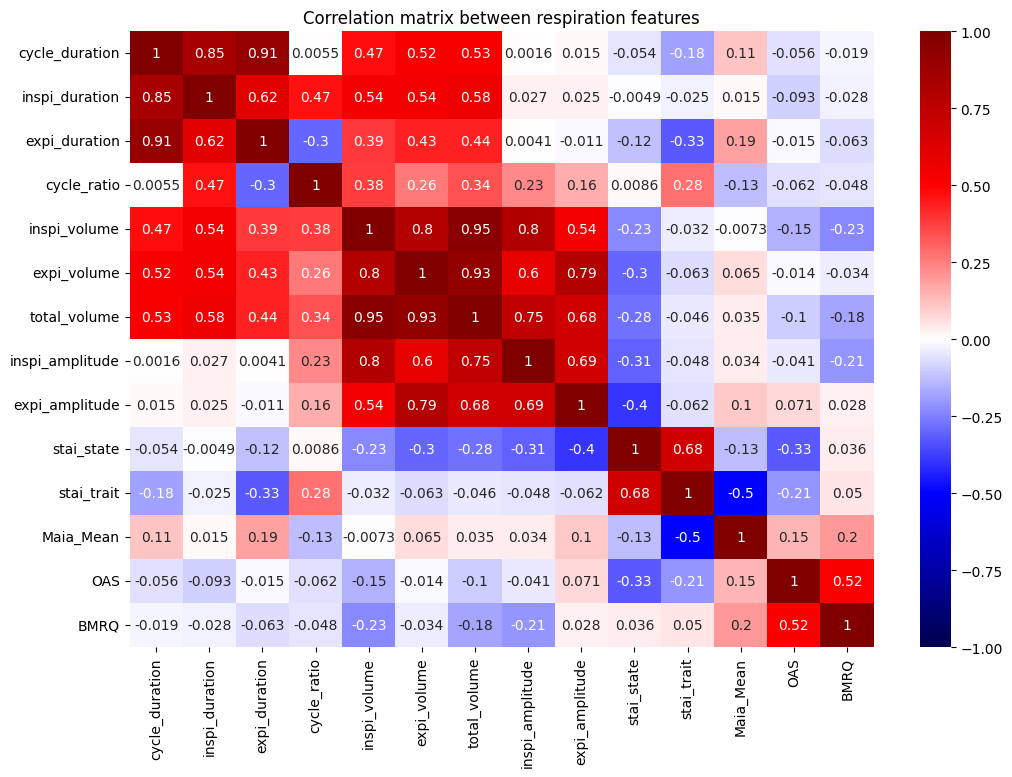

In [12]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(resp[metrics_and_psycho].corr('spearman',numeric_only = True), annot = True, vmin=-1, vmax= 1 , cmap = 'seismic', ax=ax)
ax.set_title('Correlation matrix between respiration features')
file = base_folder / 'Figures' / 'resp_features' / 'corr_matrix_resp_features.png'
fig.savefig(file, bbox_inches = 'tight')
plt.show()

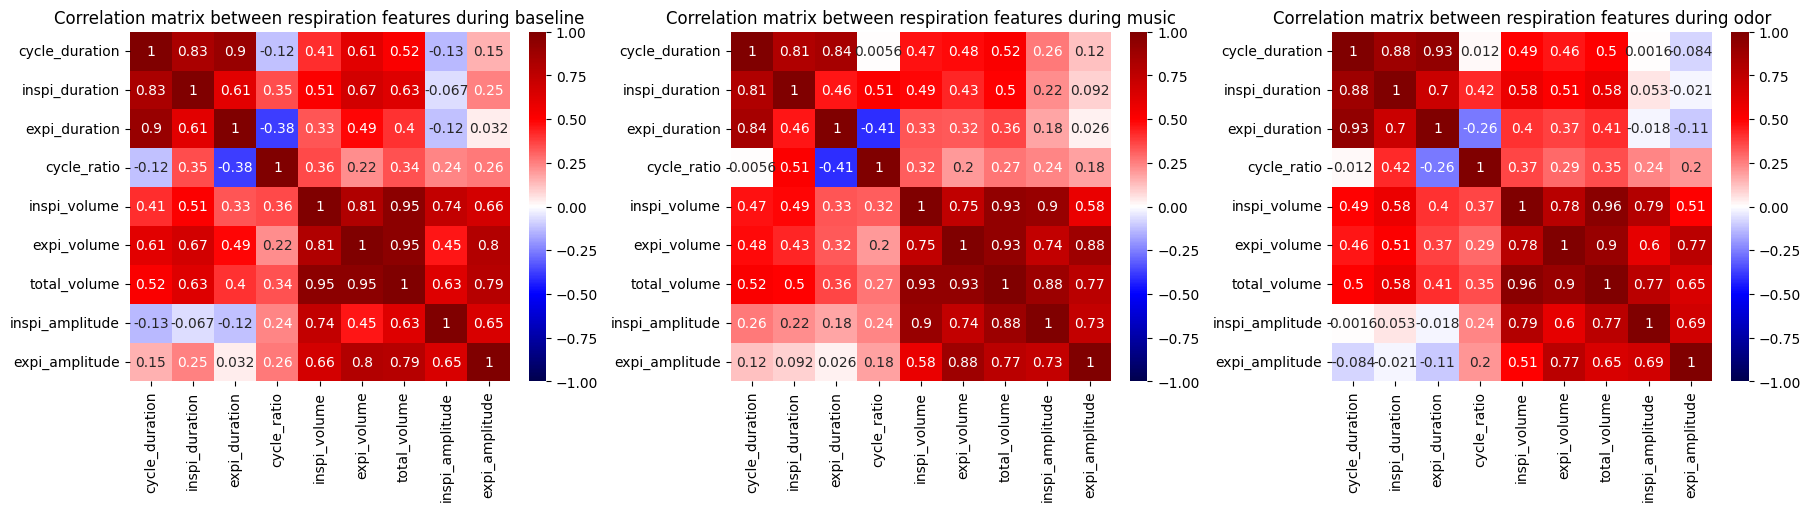

In [13]:
fig, axs = plt.subplots(ncols = 3, figsize = (18,5), constrained_layout = True)

for c, ses in enumerate(session_keys):
    ax = axs[c]
    resp_ses = resp[resp['session'] == ses]
    sns.heatmap(resp_ses[metrics].corr('spearman',numeric_only = True), annot = True, vmin=-1, vmax= 1 , cmap = 'seismic', ax=ax)
    ax.set_title(f'Correlation matrix between respiration features during {ses}')
    
file = base_folder / 'Figures' / 'resp_features' / 'corr_matrix_resp_features_by_session.png'
fig.savefig(file, bbox_inches = 'tight')
plt.show()

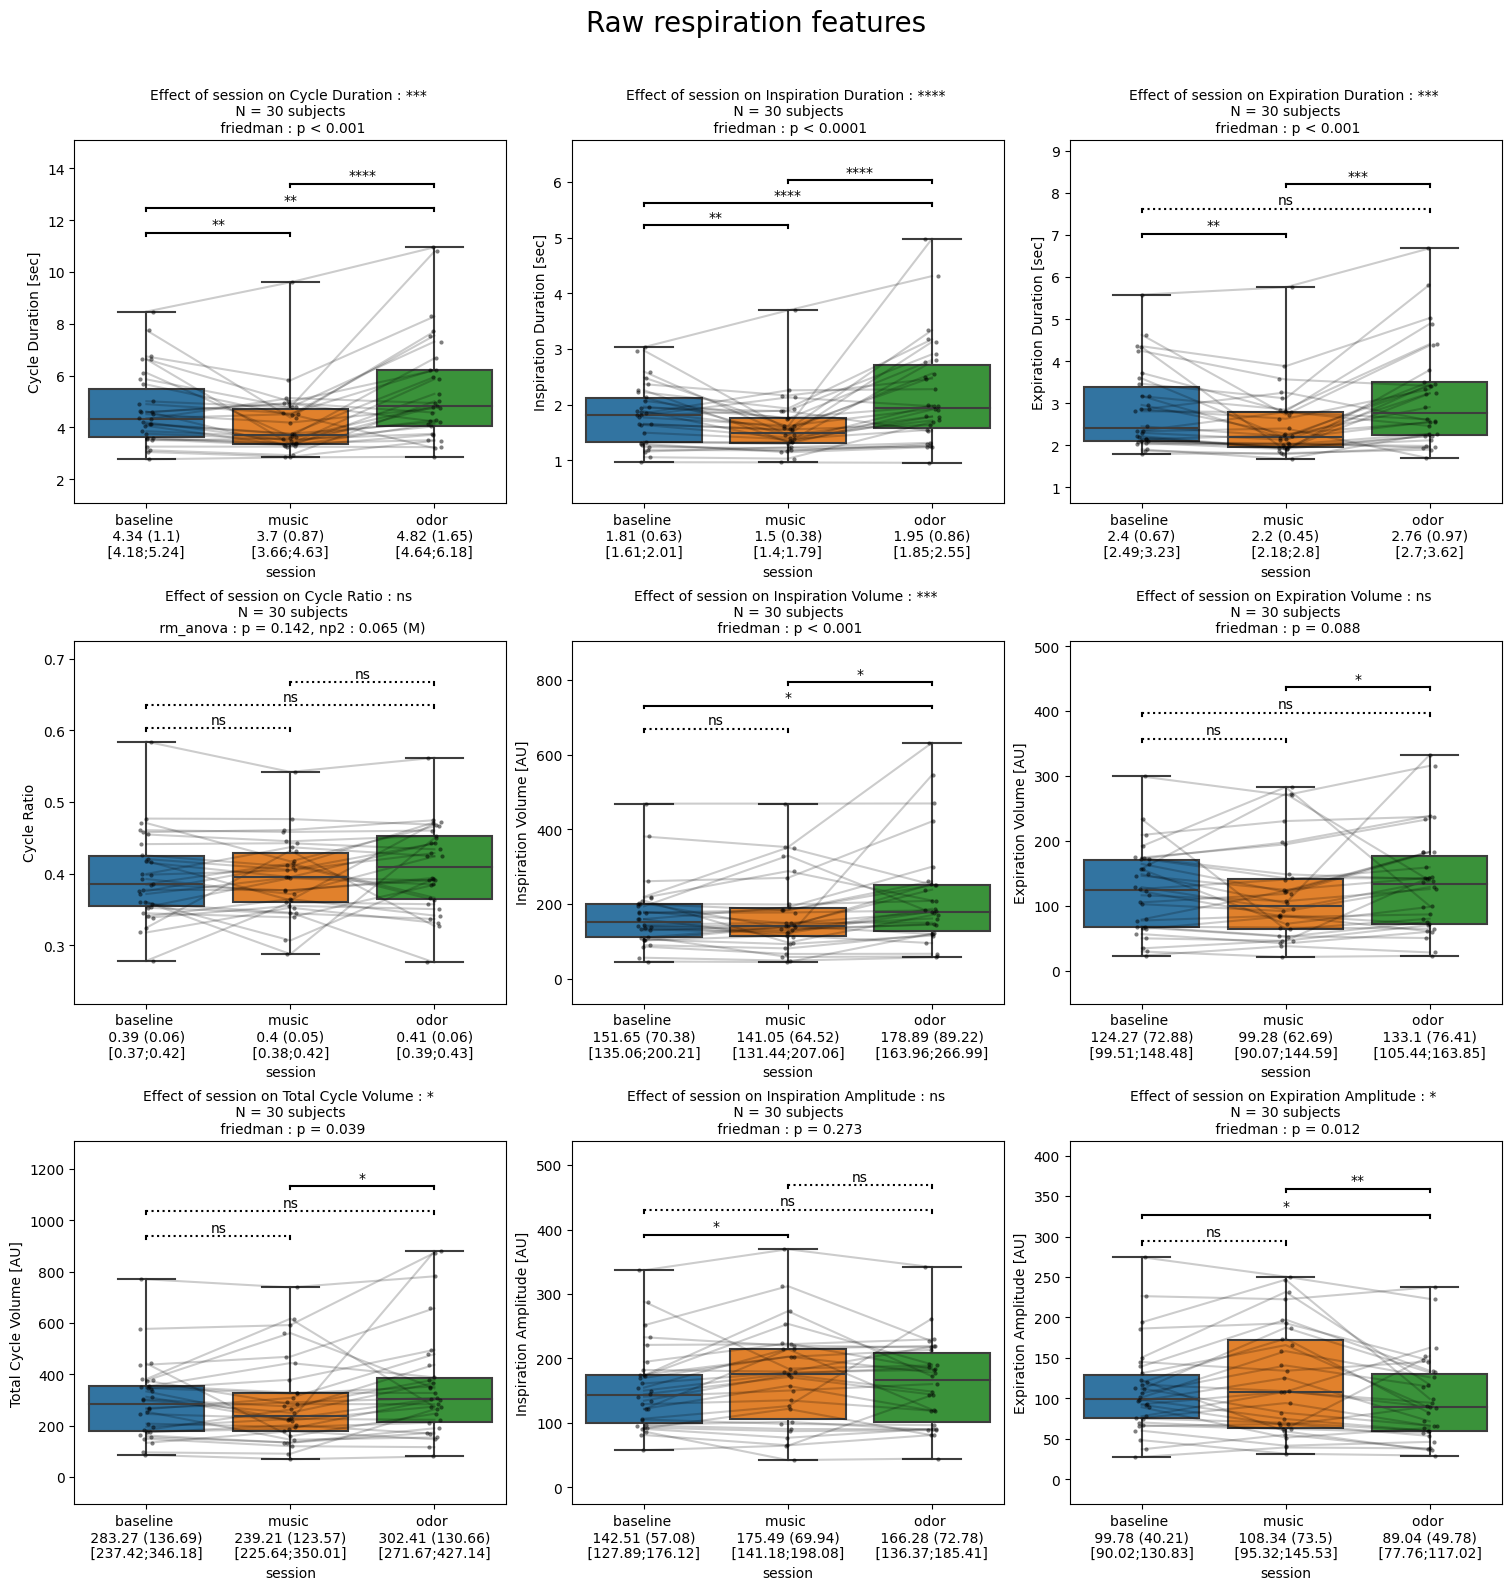

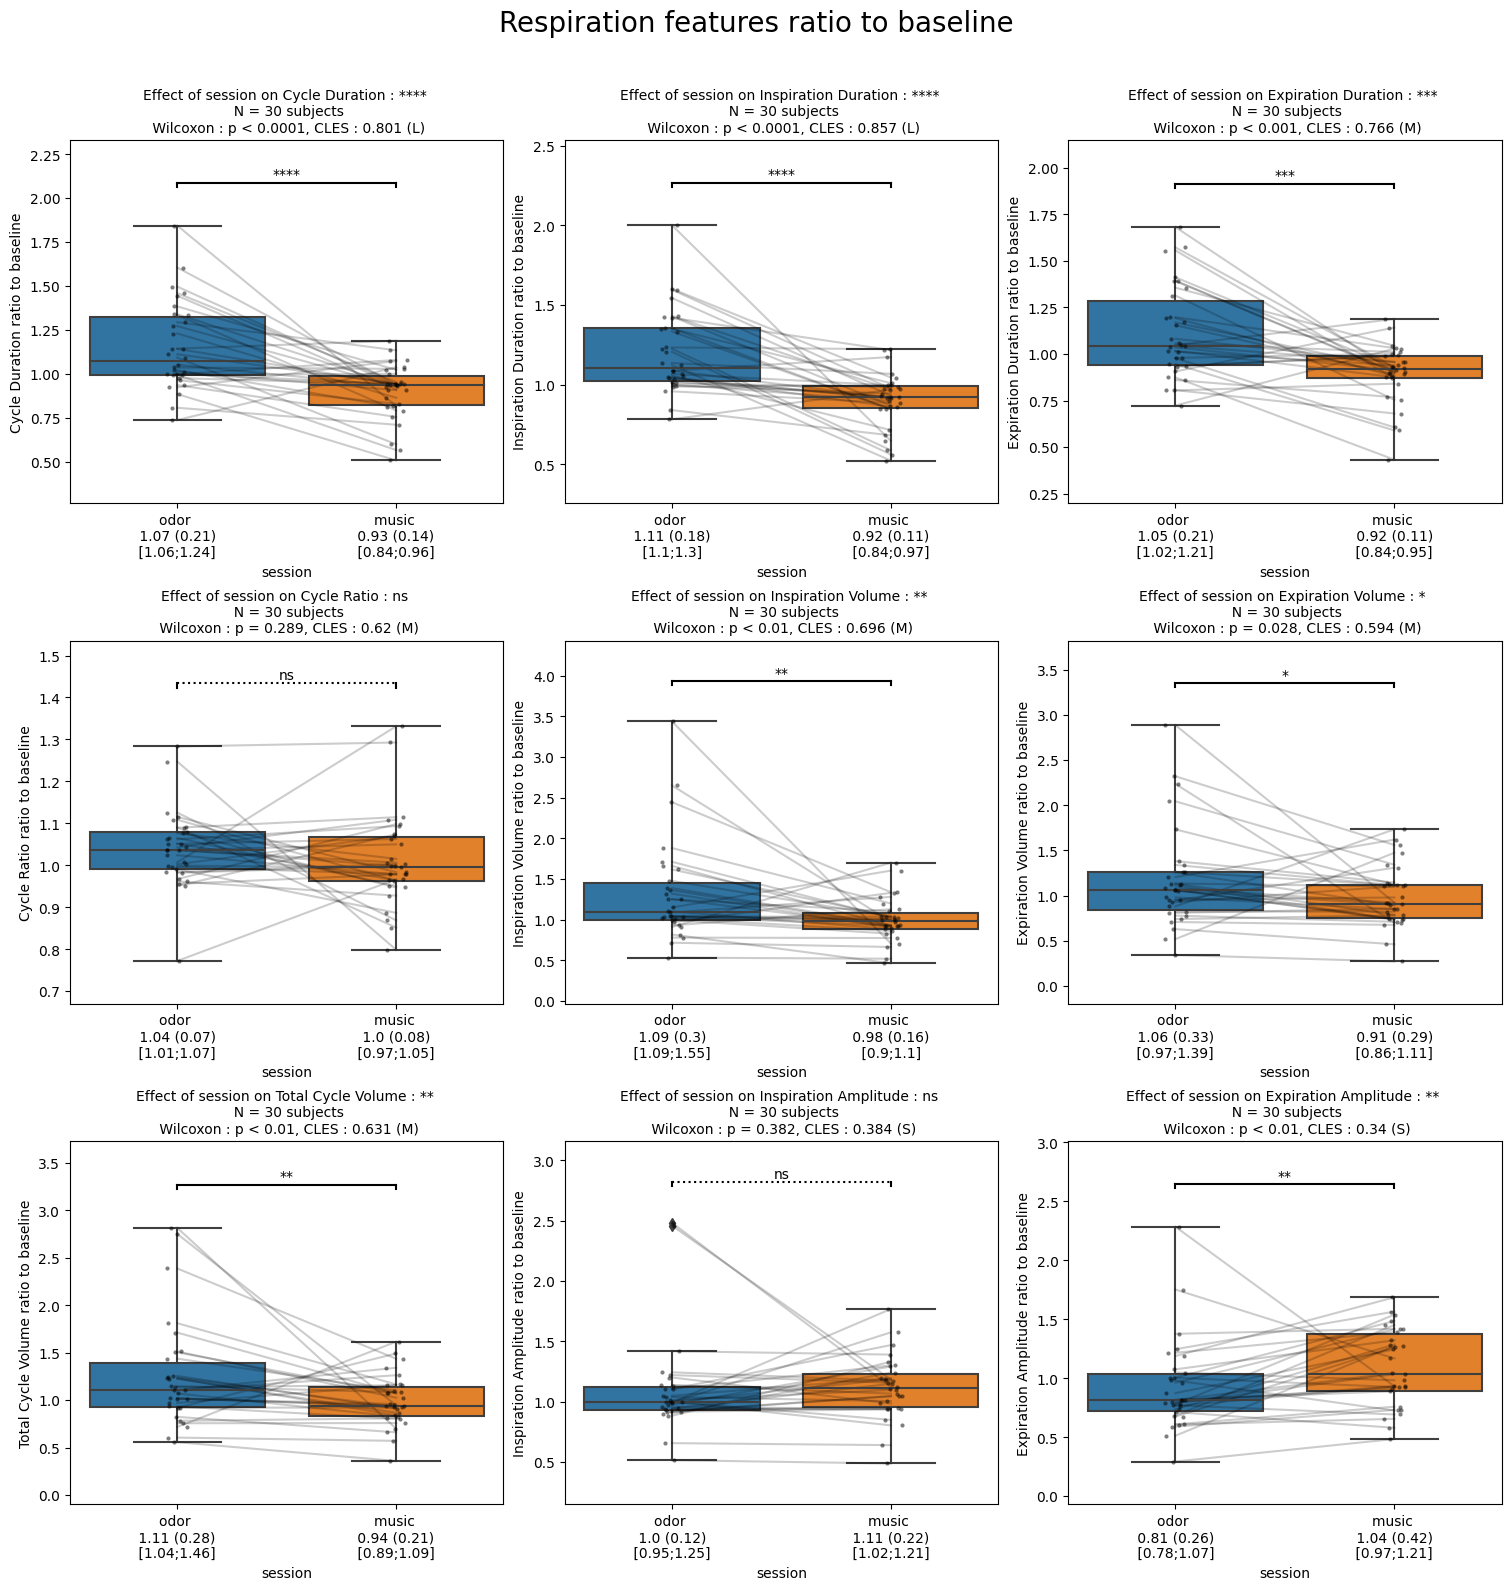

In [14]:
nrows = 3
ncols = 3
plot_metrics = np.array(metrics).reshape(nrows, ncols)

for suptitle, df in zip(['Raw respiration features','Respiration features ratio to baseline'],[resp, resp_baselined]):

    fig, axs = plt.subplots(nrows, ncols, figsize = (15,15), constrained_layout = True)
    fig.suptitle(suptitle, fontsize = 20, y = 1.05)

    for r in range(nrows):
        for c in range(ncols):
            ax = axs[r,c]
            
            metric = plot_metrics[r,c]
            
            if suptitle == 'Respiration features ratio to baseline':
                outcome_unit = None
            else:
                outcome_unit = units[metric]
            
            gh.auto_stats(df = df, 
                          predictor = 'session', 
                          outcome = metric, 
                          design = 'within',
                          subject = 'participant', 
                          ax=ax,
                         outcome_clean_label = clean_labels[metric],
                         outcome_unit = units[metric],
                         strip = True,
                         lines = True,
                         xtick_info = True)
            
            if suptitle == 'Respiration features ratio to baseline':
                ax.set_ylabel(f'{clean_labels[metric]} ratio to baseline')
                
    file = base_folder / 'Figures' / 'resp_features' / f'{suptitle}.png'
    fig.savefig(file, bbox_inches = 'tight')
    plt.show()

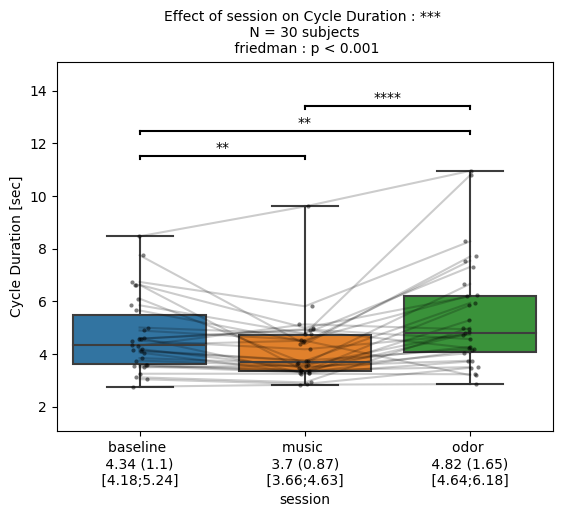

In [15]:

fig, ax = plt.subplots()
        
gh.auto_stats(df = resp, 
              predictor = 'session', 
              outcome = 'cycle_duration', 
              design = 'within',
              subject = 'participant', 
              ax=ax,
             outcome_clean_label = 'Cycle Duration',
             outcome_unit = 'sec',
             strip = True,
             lines = True,
             xtick_info = True)

                
file = base_folder / 'Figures' / 'resp_features' / f'cycle_duration_clean.png'
fig.savefig(file, bbox_inches = 'tight', dpi = 300)
plt.show()

## FIG SOUTENANCE

/tmp/ipykernel_67958/3670024742.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = fontsize)


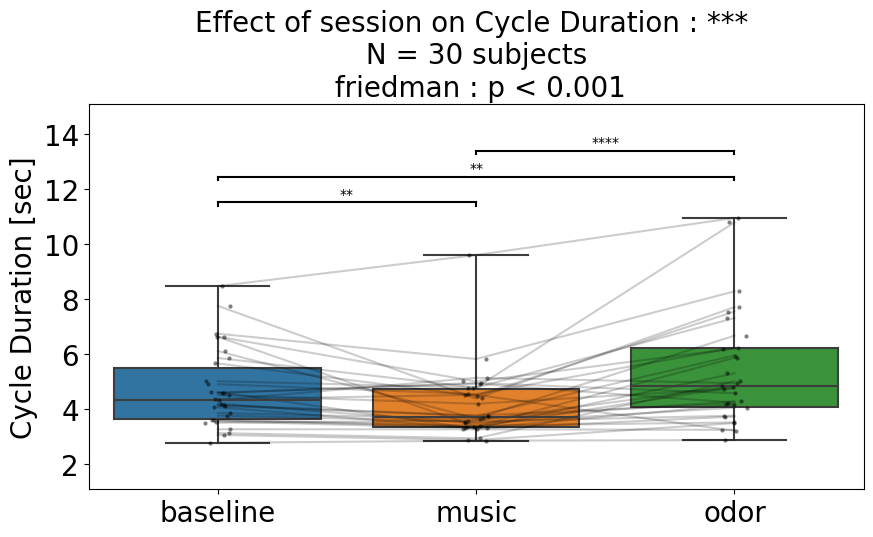

In [16]:
fig , ax = plt.subplots(figsize = (10,5))

fontsize = 20

gh.auto_stats(df = resp, 
              predictor = 'session', 
              outcome = 'cycle_duration', 
              design = 'within', 
              subject = 'participant', 
              ax=ax, 
              outcome_clean_label = 'Cycle Duration', 
              outcome_unit = 'sec',
             strip = True,
             lines = True,
             xtick_info = False,
             fontsize = fontsize)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = fontsize)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = fontsize)
ax.set_xlabel(None)
ax.set_ylabel(ax.get_ylabel(), fontsize=fontsize)

file =  base_cmo / 'users' / 'ValentinGhibaudo' / 'Rédaction_Thèse' / 'Soutenance_Thèse' / 'figures' / 'emosens3_resp.png'
fig.savefig(file, bbox_inches = 'tight', dpi = 500)

# SAVE STATS

In [17]:
stats = gh.auto_stats_summary(df = resp, predictor = 'session', outcome = 'cycle_duration', design = 'within', subject = 'participant')
file = base_folder / 'Tables' / 'stats_respi.xlsx'
gh.save_auto_stats_summary(stats, file)

# TWO POPULATIONS ?

In [18]:
resp = resp_features_concat_job.get(global_key).to_dataframe()

In [19]:
df_bis = resp.groupby(['participant','session']).mean(True).reset_index()

<AxesSubplot: title={'center': 'Effect of session on Cycle frequency : **** \n  N = 30 subjects \n rm_anova : p < 0.0001, np2 : 0.373 (L)'}, xlabel='session', ylabel='Cycle frequency [Hz]'>

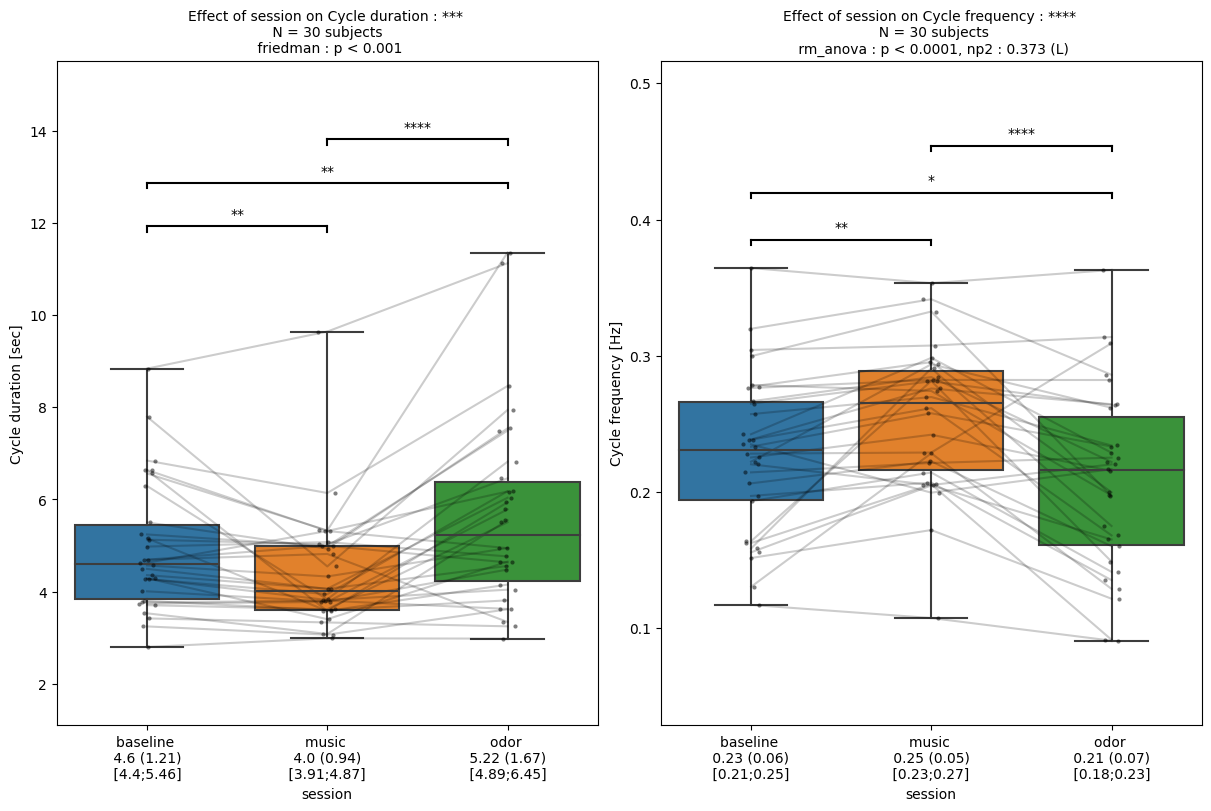

In [20]:
fig, axs = plt.subplots(ncols = 2, figsize = (12,8), constrained_layout = True)

ax = axs[0]
gh.auto_stats(df = df_bis, 
              ax=ax,
              predictor = 'session', 
              outcome = 'cycle_duration', 
              design = 'within',
              subject = 'participant', 
             outcome_clean_label = 'Cycle duration',
             outcome_unit = 'sec',
             strip = True,
             lines = True,
             xtick_info = True)

ax = axs[1]
gh.auto_stats(df = df_bis, 
              ax=ax,
              predictor = 'session', 
              outcome = 'cycle_freq', 
              design = 'within',
              subject = 'participant', 
             outcome_clean_label = 'Cycle frequency',
             outcome_unit = 'Hz',
             strip = True,
             lines = True,
             xtick_info = True)


# fig.savefig(base_folder / 'Figures' / 'Autres' / 'cycle_freq_vs_duration.png', dpi = 500, bbox_inches = 'tight')

In [21]:
study = df_bis[['participant','session','cycle_freq']]

In [22]:
mask_music_increase = pd.Series(study[study['session'] == 'music']['cycle_freq'].values - study[study['session'] == 'baseline']['cycle_freq'].values, index = study['participant'].unique()) > 0

In [23]:
mask_odor_decrease = pd.Series(study[study['session'] == 'odor']['cycle_freq'].values - study[study['session'] == 'baseline']['cycle_freq'].values, index = study['participant'].unique()) < 0

In [24]:
mask = mask_music_increase & mask_odor_decrease

In [25]:
repondeurs = list(mask.index[mask])
non_repondeurs = list(mask.index[~mask])
mapper_répondeur = {sub:'répondeur' if sub in repondeurs else 'non_répondeur' for sub in mask.index}

In [26]:
pd.Series(mapper_répondeur).value_counts()

répondeur        16
non_répondeur    14
Name: count, dtype: int64

In [27]:
mapper_répondeur

{'P01': 'non_répondeur',
 'P02': 'répondeur',
 'P03': 'non_répondeur',
 'P04': 'répondeur',
 'P05': 'répondeur',
 'P06': 'répondeur',
 'P07': 'répondeur',
 'P08': 'répondeur',
 'P09': 'non_répondeur',
 'P10': 'répondeur',
 'P11': 'répondeur',
 'P12': 'non_répondeur',
 'P13': 'non_répondeur',
 'P14': 'répondeur',
 'P15': 'non_répondeur',
 'P16': 'non_répondeur',
 'P17': 'non_répondeur',
 'P18': 'répondeur',
 'P19': 'non_répondeur',
 'P20': 'répondeur',
 'P21': 'non_répondeur',
 'P23': 'non_répondeur',
 'P24': 'non_répondeur',
 'P25': 'répondeur',
 'P26': 'répondeur',
 'P27': 'répondeur',
 'P28': 'répondeur',
 'P29': 'non_répondeur',
 'P30': 'répondeur',
 'P31': 'non_répondeur'}

In [28]:
df_bis['is_répondeur'] = df_bis['participant'].map(mapper_répondeur)

In [29]:
df_bis

participant   session    inspi_index     expi_index  next_inspi_index   
0          P01  baseline  295355.323944  296315.267606     298150.769953  \
1          P01     music  298572.765000  299636.555000     301555.360000   
2          P01      odor  302365.170000  303379.540000     305342.805000   
3          P02  baseline  306048.542553  308661.765957     312339.723404   
4          P02     music  286695.205128  288219.320513     290524.750000   
..         ...       ...            ...            ...               ...   
85         P30     music  294211.977143  295604.908571     297611.274286   
86         P30      odor  334061.562500  336237.601562     338708.820312   
87         P31  baseline  318818.550388  321000.294574     323443.395349   
88         P31     music  308114.234234  310580.297297     313427.459459   
89         P31      odor  319266.842975  321604.553719     324208.338843   

    inspi_time   expi_time  next_inspi_time  cycle_duration  inspi_duration   
0   295.355324  296.315268       298.150770        2.795446        0.959944  \
1   298.572765  299.636555       301.555360        2.982595        1.063790   
2   302.365170  303.379540       305.342805        2.977635        1.014370   
3   306.048543  308.661766       312.339723        6.291181        2.613223   
4   286.695205  288.219321       290.524750        3.829545        1.524115   
..         ...         ...              ...             ...             ...   
85  294.211977  295.604909       297.611274        3.399297        1.392931   
86  334.061562  336.237602       338.708820        4.647258        2.176039   
87  318.818550  321.000295       323.443395        4.624845        2.181744   
88  308.114234  310.580297       313.427459        5.313225        2.466063   
89  319.266843  321.604554       324.208339        4.941496        2.337711   

    ...  inspi_amplitude  expi_amplitude  total_volume  artifact  stai_state   
0   ...       103.253979       51.054834     93.189448  0.098592        40.0  \
1   ...        92.505867       34.956457     79.618824  0.160000        40.0   
2   ...       113.346064       30.353593     90.599419  0.165000        40.0   
3   ...       105.356333       94.962771    314.879278  0.191489        24.0   
4   ...       132.037495      108.931718    251.268901  0.384615        24.0   
..  ...              ...             ...           ...       ...         ...   
85  ...       156.690015      160.753554    287.556252  0.080000        25.0   
86  ...       120.611515      129.905541    325.265440  0.156250        25.0   
87  ...       173.998595       91.881113    361.354954  0.155039        29.0   
88  ...       256.460895       76.040818    482.886398  0.207207        29.0   
89  ...       194.476596       92.690006    422.041791  0.239669        29.0   

    stai_trait  Maia_Mean       OAS      BMRQ   is_répondeur  
0         61.0   1.019643  2.666667  2.727273  non_répondeur  
1         61.0   1.019643  2.666667  2.727273  non_répondeur  
2         61.0   1.019643  2.666667  2.727273  non_répondeur  
3         37.0   3.354762  3.066667  3.000000      répondeur  
4         37.0   3.354762  3.066667  3.000000      répondeur  
..         ...        ...       ...       ...            ...  
85        29.0   3.071131  2.966667  3.045455      répondeur  
86        29.0   3.071131  2.966667  3.045455      répondeur  
87        40.0   2.790774  2.933333  2.681818  non_répondeur  
88        40.0   2.790774  2.933333  2.681818  non_répondeur  
89        40.0   2.790774  2.933333  2.681818  non_répondeur  

[90 rows x 26 columns]

<AxesSubplot: xlabel='session', ylabel='cycle_freq'>

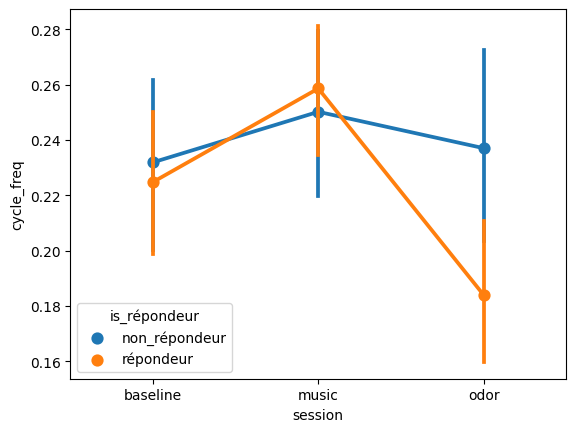

In [30]:
sns.pointplot(data = df_bis, x = 'session', y = 'cycle_freq', hue = 'is_répondeur')

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


<AxesSubplot: title={'center': 'Interaction session * is_répondeur on cycle_freq : ns \n anova : pcorr  = 0.115, np2 : 0.05 (S) \n p-session = 0.012 , p-is_répondeur = 0.168'}, xlabel='session', ylabel='cycle_freq'>

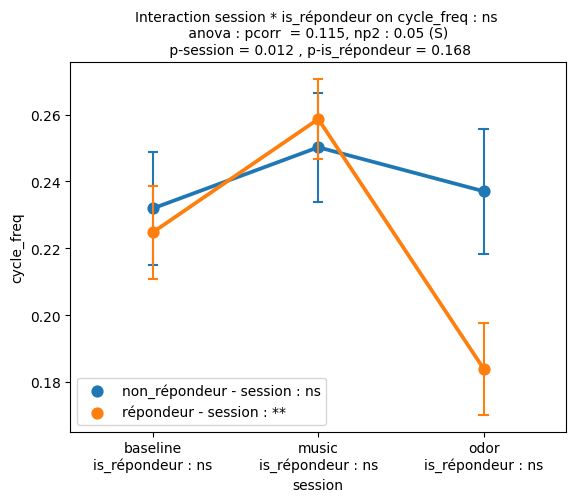

In [31]:
fig, ax = plt.subplots()

gh.auto_stats(df = df_bis,
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'cycle_freq', 
              design = 'between',
              subject = 'participant'
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_respi.png', dpi = 500, bbox_inches = 'tight')

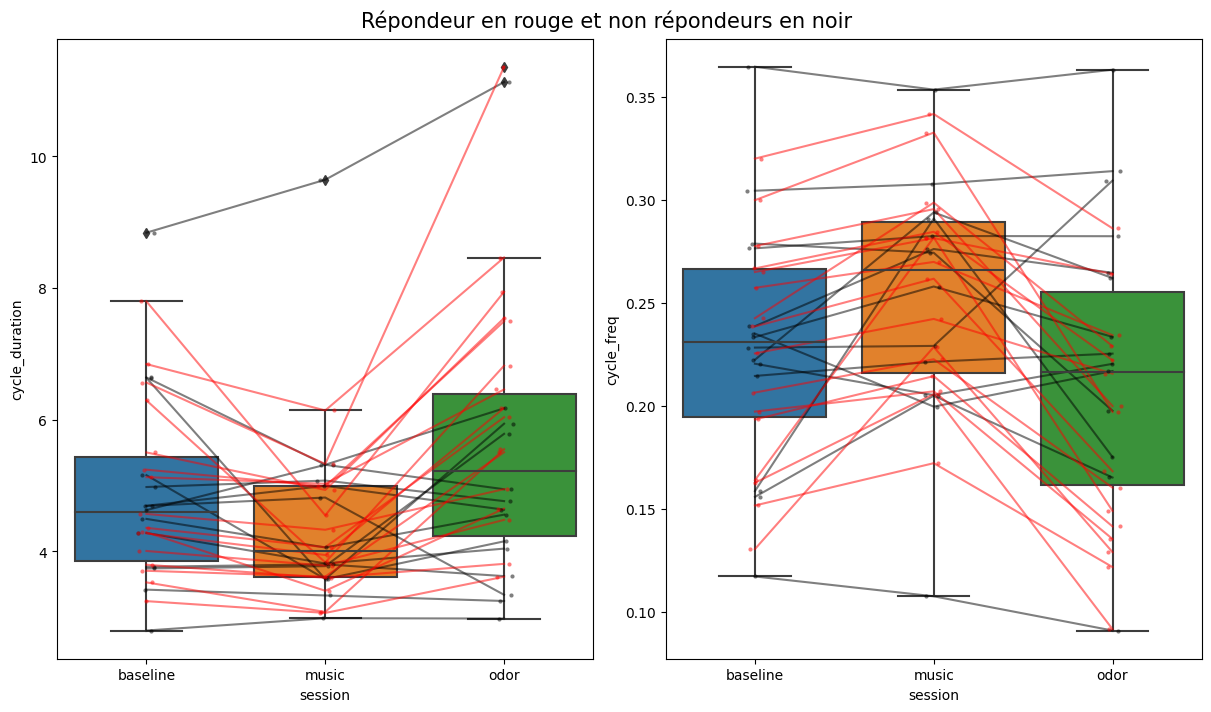

In [32]:
fig , axs = plt.subplots(ncols = 2, figsize = (12,7), constrained_layout = True)
fig.suptitle('Répondeur en rouge et non répondeurs en noir', fontsize = 15)


for c, metric in enumerate(['cycle_duration','cycle_freq']):
    ax = axs[c]
    sns.boxplot(data = df_bis, x = 'session', y = metric, ax=ax)

    colors = {'répondeur':'r', 'non_répondeur':'k'}
    
    for is_rep in df_bis['is_répondeur'].unique():
        palette = [colors[is_rep]] * df_bis[df_bis['is_répondeur'] == is_rep]['participant'].unique().size
        sns.stripplot(data = df_bis[df_bis['is_répondeur'] == is_rep], x = 'session', y =metric, ax=ax, color = colors[is_rep], size = 3, jitter = 0.05, alpha = 0.5)
        sns.lineplot(data = df_bis[df_bis['is_répondeur'] == is_rep], x = 'session', y =metric, hue = 'participant', ax=ax,palette = palette, alpha = 0.5)
        legend = ax.legend()
        legend.remove()
                                             
fig.savefig(base_folder / 'Figures' / 'Autres' / 'boxplots_rep_no_rep_respi.png', dpi = 500, bbox_inches = 'tight')

## HRV + RSA + Psycho :  Rep / No rep

In [33]:
from compute_global_dataframes import rsa_concat_job
from compute_global_dataframes import hrv_concat_job
from compute_global_dataframes import relaxation_concat_job

### HRV

In [34]:
hrv = hrv_concat_job.get(global_key).to_dataframe()
hrv['is_répondeur'] = df_bis['participant'].map(mapper_répondeur)

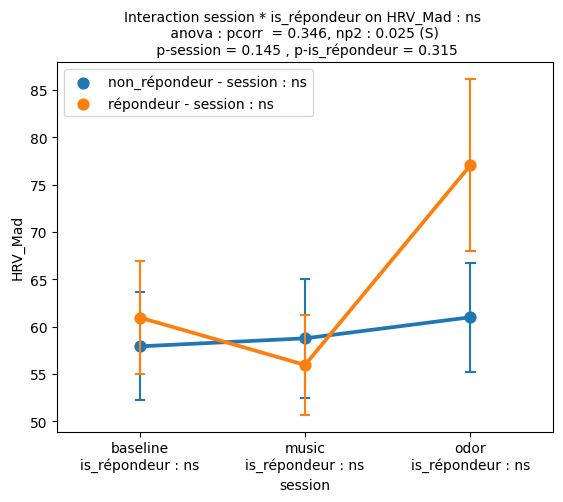

In [35]:
fig, ax = plt.subplots()

gh.auto_stats(df = hrv,
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'HRV_Mad', 
              design = 'between',
              subject = 'participant'
             )

fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_HRV.png', dpi = 500, bbox_inches = 'tight')

### RSA

In [36]:
rsa = rsa_concat_job.get(global_key).to_dataframe()
rsa = rsa.groupby(['participant','session']).median(True).reset_index()
rsa['is_répondeur'] = df_bis['participant'].map(mapper_répondeur)

In [37]:
rsa

participant   session  peak_index  trough_index  peak_time  trough_time   
0          P01  baseline      2993.0        3007.0   299.3130     300.7130  \
1          P01     music      3016.5        3030.5   301.7140     303.1140   
2          P01      odor      2995.5        3013.0   299.5840     301.3340   
3          P02  baseline      3172.5        3190.0   317.3165     319.0665   
4          P02     music      2806.0        2822.0   280.6380     282.2380   
..         ...       ...         ...           ...        ...          ...   
85         P30     music      2966.0        2984.0   296.6990     298.4990   
86         P30      odor      3507.0        3529.5   350.7435     352.9935   
87         P31  baseline      3357.0        3379.0   335.7750     337.9750   
88         P31     music      3153.0        3178.0   315.3110     317.8110   
89         P31      odor      3318.0        3344.0   331.8700     334.4700   

    peak_value  trough_value  rising_amplitude  decay_amplitude   
0    86.714163     82.792616          3.768560         3.829268  \
1    83.910902     80.030339          3.572436         3.586949   
2    81.541600     77.209442          3.904454         3.532254   
3    92.036706     70.585770         19.668615        20.217852   
4    85.950638     75.508218          9.846101        10.017317   
..         ...           ...               ...              ...   
85   66.582222     63.588428          2.974849         2.829453   
86   65.222211     61.507596          3.408852         3.419358   
87   77.091564     70.775628          5.841886         5.280174   
88   72.713747     65.096112          6.873399         6.261407   
89   76.680600     69.655959          6.278198         6.182565   

    rising_duration  decay_duration  rising_slope  decay_slope  stai_state   
0            1.1345            1.50      2.929955     2.597615        40.0  \
1            1.3610            1.50      2.538447     2.514716        40.0   
2            1.4110            1.45      2.749728     2.601323        40.0   
3            3.5130            2.80      5.833946     7.331331        24.0   
4            1.8210            2.00      5.363314     5.708185        24.0   
..              ...             ...           ...          ...         ...   
85           1.3165            1.80      2.042907     1.710240        25.0   
86           2.0840            2.00      1.585456     1.678314        25.0   
87           2.4525            2.20      2.488835     2.696350        29.0   
88           2.7830            2.50      2.422154     2.886400        29.0   
89           2.5475            2.40      2.630189     2.771170        29.0   

    stai_trait  Maia_Mean       OAS      BMRQ   is_répondeur  
0         61.0   1.019643  2.666667  2.727273  non_répondeur  
1         61.0   1.019643  2.666667  2.727273  non_répondeur  
2         61.0   1.019643  2.666667  2.727273  non_répondeur  
3         37.0   3.354762  3.066667  3.000000      répondeur  
4         37.0   3.354762  3.066667  3.000000      répondeur  
..         ...        ...       ...       ...            ...  
85        29.0   3.071131  2.966667  3.045455      répondeur  
86        29.0   3.071131  2.966667  3.045455      répondeur  
87        40.0   2.790774  2.933333  2.681818  non_répondeur  
88        40.0   2.790774  2.933333  2.681818  non_répondeur  
89        40.0   2.790774  2.933333  2.681818  non_répondeur  

[90 rows x 20 columns]

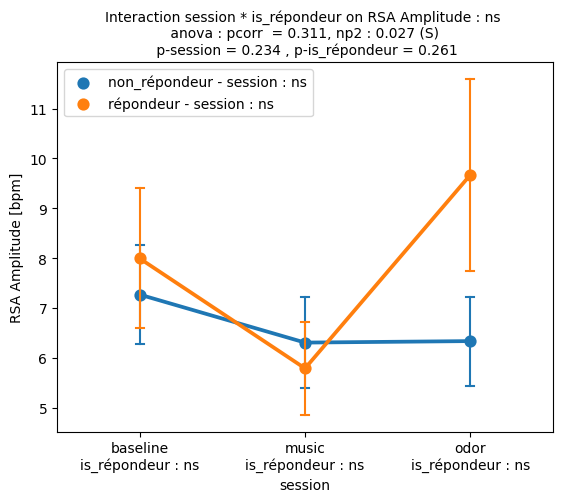

In [38]:
fig, ax = plt.subplots()

gh.auto_stats(df = rsa,
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'decay_amplitude', 
              design = 'between',
              subject = 'participant',
              outcome_clean_label = 'RSA Amplitude',
              outcome_unit = 'bpm'
             )

fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_RSA.png', dpi = 500, bbox_inches = 'tight')

### Relaxation

In [39]:
relaxation = relaxation_concat_job.get(global_key).to_dataframe()
relaxation['is_répondeur'] = df_bis['participant'].map(mapper_répondeur)

In [40]:
relaxation

participant   session              stim_name  Arousal  Relaxation   
dim_0                                                                     
0             P01  baseline                              11          10  \
1             P01     music              Classique       24          66   
2             P01      odor  Fleur d'oranger épicé       13          67   
3             P02  baseline                               7          93   
4             P02     music              Classique       35          89   
...           ...       ...                    ...      ...         ...   
85            P30     music                Electro       86          56   
86            P30      odor          Pêche Lavande       36          93   
87            P31  baseline                              22          75   
88            P31     music                  Metal       83          65   
89            P31      odor          Pêche Lavande       60          68   

       Relaxation_intensity  Perceived_duration  stai_state  stai_trait   
dim_0                                                                     
0                         4                  96          40          61  \
1                        61                  75          40          61   
2                        61                  87          40          61   
3                        95                  62          24          37   
4                        91                  59          24          37   
...                     ...                 ...         ...         ...   
85                       78                  55          25          29   
86                       87                  59          25          29   
87                       67                  12          29          40   
88                       67                  22          29          40   
89                       77                  12          29          40   

      Gender  Maia_Mean       OAS      BMRQ   is_répondeur  
dim_0                                                       
0          F   1.019643  2.666667  2.727273  non_répondeur  
1          F   1.019643  2.666667  2.727273  non_répondeur  
2          F   1.019643  2.666667  2.727273  non_répondeur  
3          F   3.354762  3.066667  3.000000      répondeur  
4          F   3.354762  3.066667  3.000000      répondeur  
...      ...        ...       ...       ...            ...  
85         M   3.071131  2.966667  3.045455      répondeur  
86         M   3.071131  2.966667  3.045455      répondeur  
87         M   2.790774  2.933333  2.681818  non_répondeur  
88         M   2.790774  2.933333  2.681818  non_répondeur  
89         M   2.790774  2.933333  2.681818  non_répondeur  

[90 rows x 14 columns]

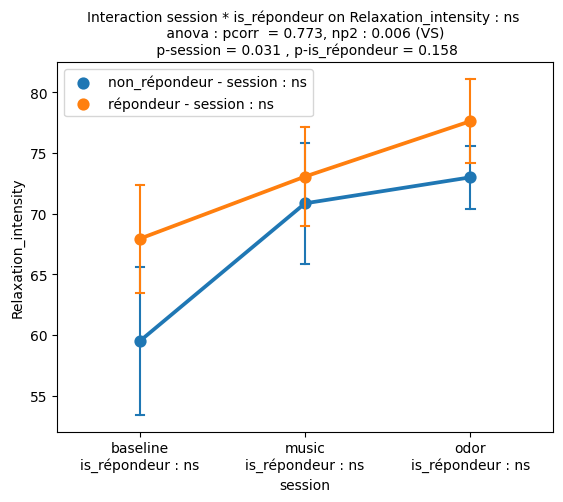

In [41]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'Relaxation_intensity', 
              design = 'between',
              subject = 'participant',
             )

fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_relaxation.png', dpi = 500, bbox_inches = 'tight')

<AxesSubplot: title={'center': 'Interaction session * is_répondeur on Arousal : ns \n anova : pcorr  = 0.89, np2 : 0.003 (VS) \n p-session < 0.0001 , p-is_répondeur = 0.765'}, xlabel='session', ylabel='Arousal'>

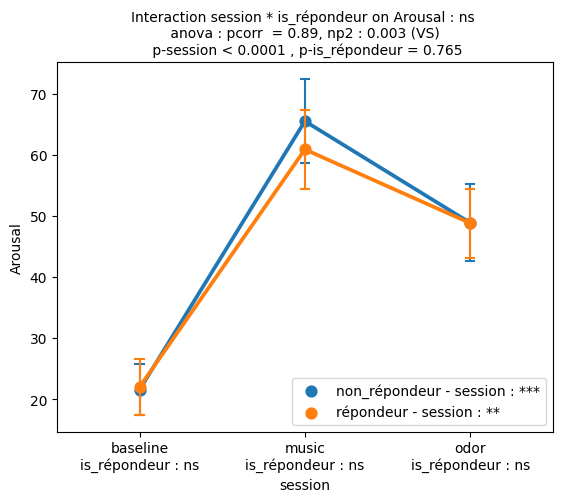

In [42]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'Arousal', 
              design = 'between',
              subject = 'participant',
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_relaxation.png', dpi = 500, bbox_inches = 'tight')

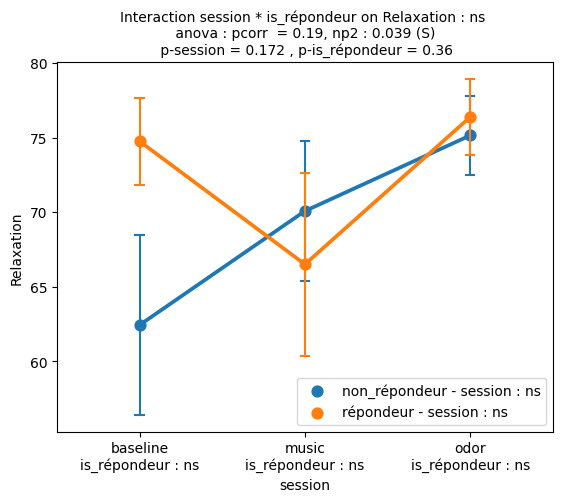

In [43]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'Relaxation', 
              design = 'between',
              subject = 'participant',
             )

fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_relaxation_item_bizarre.png', dpi = 500, bbox_inches = 'tight')

<AxesSubplot: title={'center': 'Interaction session * is_répondeur on Perceived_duration : ns \n anova : pcorr  = 0.703, np2 : 0.008 (VS) \n p-session = 0.154 , p-is_répondeur = 0.353'}, xlabel='session', ylabel='Perceived_duration'>

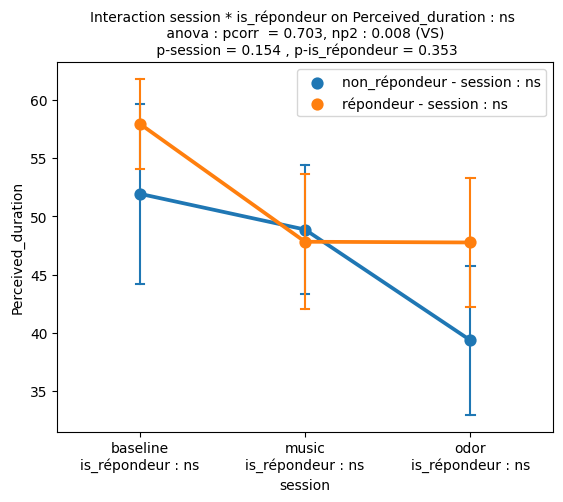

In [44]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'Perceived_duration', 
              design = 'between',
              subject = 'participant',
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_relaxation_item_bizarre.png', dpi = 500, bbox_inches = 'tight')

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


<AxesSubplot: title={'center': 'Effect of session on Relaxation_intensity : ns \n N = 16 subjects \n friedman : p = 0.533'}, xlabel='session', ylabel='Relaxation_intensity'>

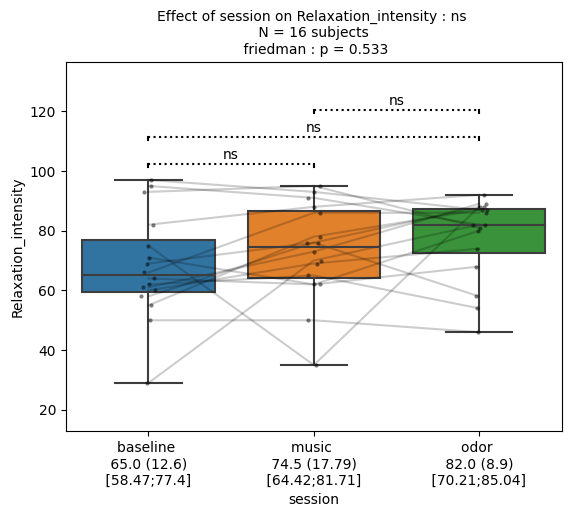

In [45]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation[relaxation['is_répondeur'] == 'répondeur'],
              ax=ax,
              predictor = 'session',
              outcome = 'Relaxation_intensity', 
              design = 'within',
              subject = 'participant',
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_relaxation.png', dpi = 500, bbox_inches = 'tight')

<AxesSubplot: title={'center': 'Effect of session on Relaxation_intensity : ns \n N = 14 subjects \n friedman : p = 0.185'}, xlabel='session', ylabel='Relaxation_intensity'>

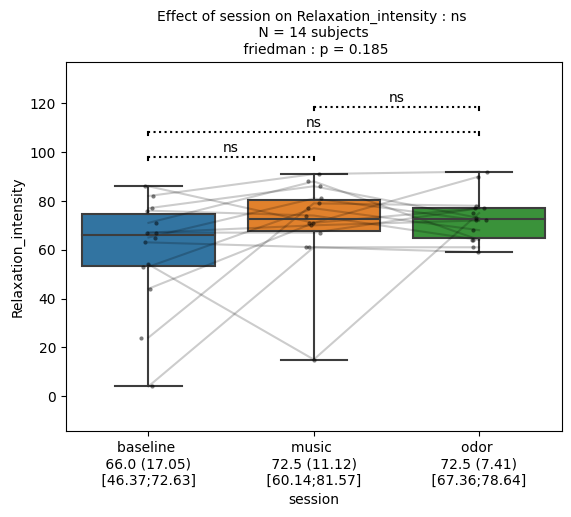

In [46]:
fig, ax = plt.subplots()

gh.auto_stats(df = relaxation[relaxation['is_répondeur'] == 'non_répondeur'],
              ax=ax,
              predictor = 'session',
              outcome = 'Relaxation_intensity', 
              design = 'within',
              subject = 'participant',
             )

# fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_relaxation.png', dpi = 500, bbox_inches = 'tight')

### OAS & BMRQ

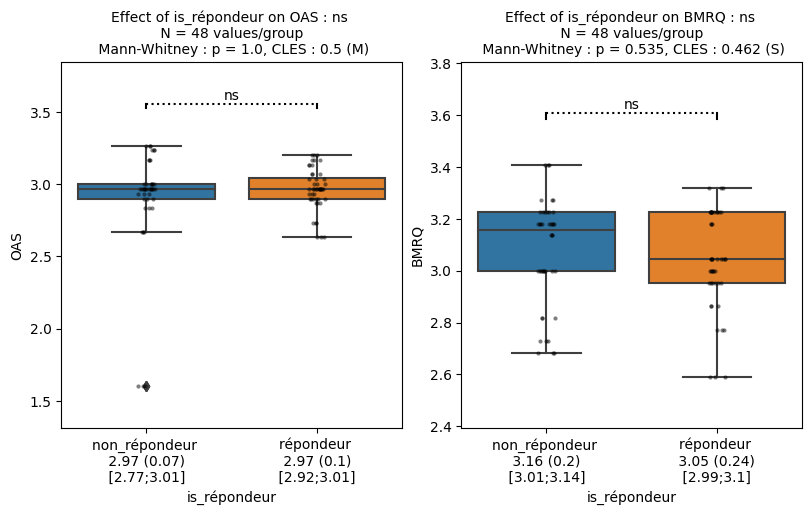

In [47]:
fig, axs = plt.subplots(ncols = 2, figsize = (8,5), constrained_layout = True)

for c, metric in enumerate(['OAS','BMRQ']):
    ax = axs[c]
    gh.auto_stats(df = relaxation,
                  ax=ax,
                  predictor = 'is_répondeur',
                  outcome = metric,
                  design = 'between',
                  subject = 'participant',
                 )
    
fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_is_répondeur_sur_oas_et_bmrq.png', bbox_inches = 'tight', dpi = 500)    

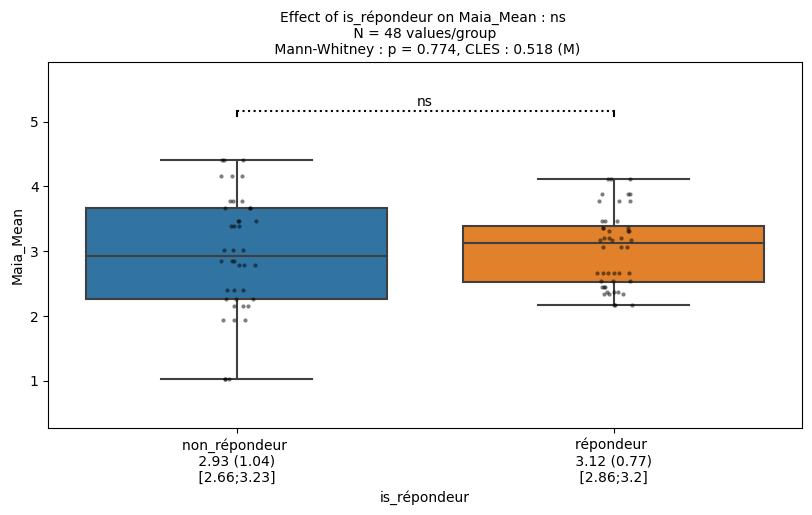

In [48]:
fig, ax = plt.subplots(figsize = (8,5), constrained_layout = True)

gh.auto_stats(df = relaxation,
              ax=ax,
              predictor = 'is_répondeur',
              outcome = 'Maia_Mean',
              design = 'between',
              subject = 'participant',
             )

fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_is_répondeur_maia_mean.png', bbox_inches = 'tight', dpi = 500)    

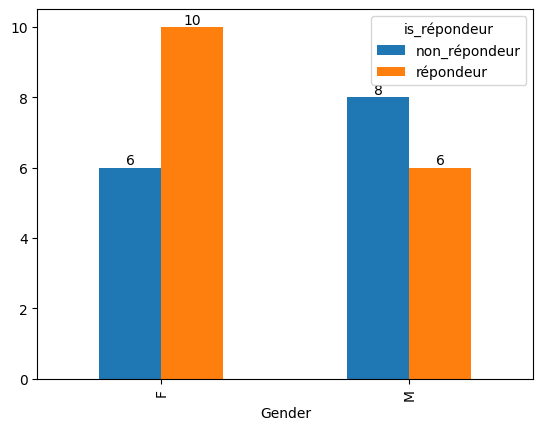

In [49]:
fig, ax = plt.subplots()
(pd.crosstab(index = relaxation['Gender'] , columns = relaxation['is_répondeur']) / 3).plot.bar(ax=ax)
for bar in ax.containers:
    ax.bar_label(bar)
fig.savefig(base_folder / 'Figures' / 'Autres' / 'count_répondeurs_by_genre.png', bbox_inches = 'tight', dpi = 500)    

### Synthèse

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


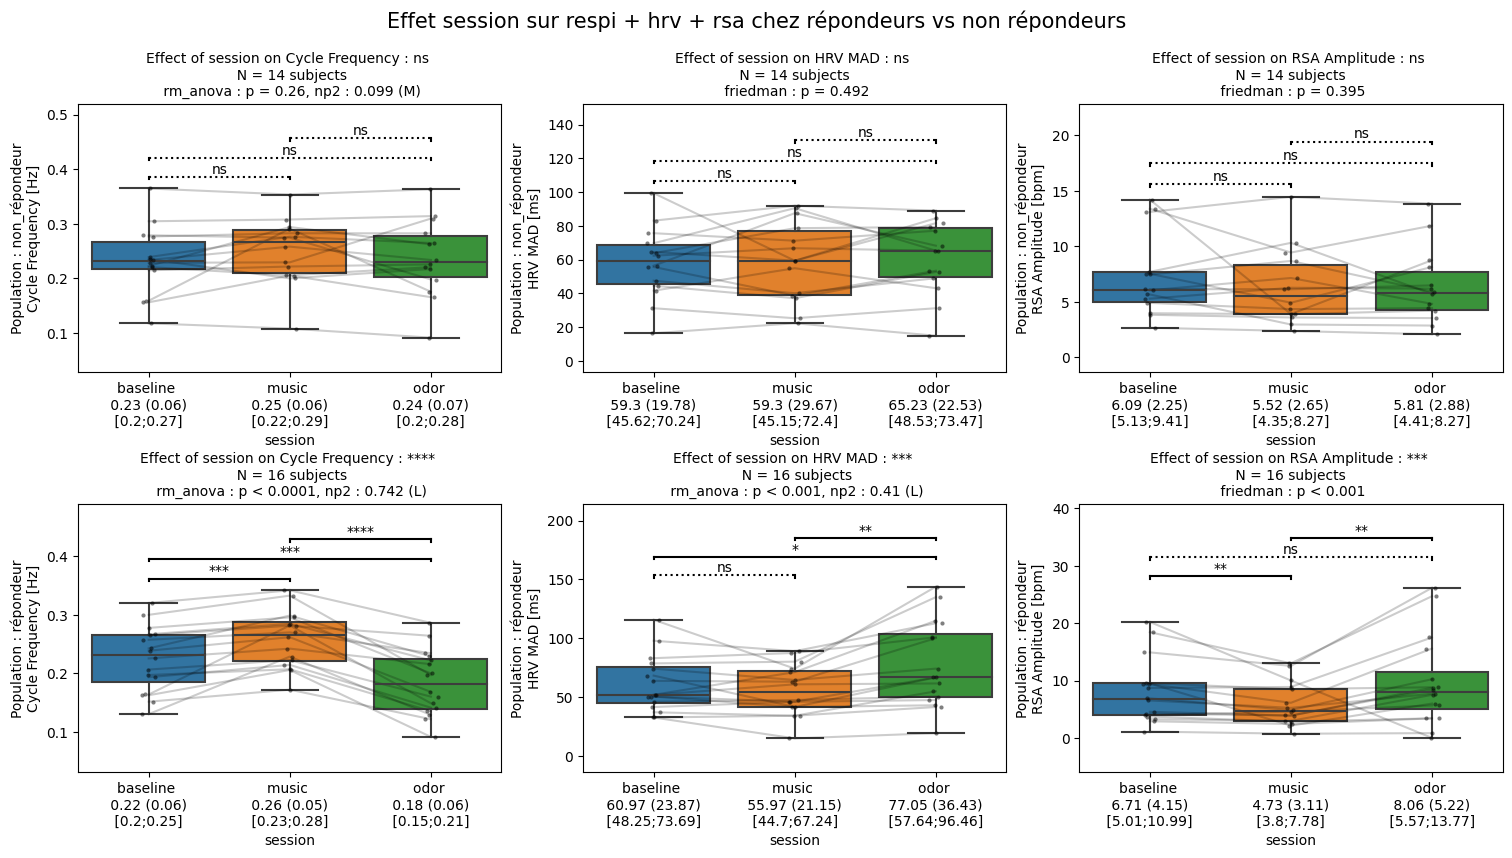

In [50]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,8), constrained_layout = True)
fig.suptitle('Effet session sur respi + hrv + rsa chez répondeurs vs non répondeurs', fontsize = 15, y = 1.05)

dfs = {'Respi':df_bis, 'HRV':hrv , 'RSA':rsa}
metrics = {'Respi':'cycle_freq','HRV':'HRV_Mad', 'RSA':'decay_amplitude'}
labels = {'Respi':'Cycle Frequency','HRV':'HRV MAD', 'RSA':'RSA Amplitude'}
units = {'Respi':'Hz','HRV':'ms', 'RSA':'bpm'}

for r, is_rep in enumerate(hrv['is_répondeur'].unique()):
    for c, df_key in enumerate(dfs.keys()):
        
        ax = axs[r,c]
        
        df = dfs[df_key]
        metric = metrics[df_key]
        label = labels[df_key]
        unit = units[df_key]
        
        df_is_rep = df[df['is_répondeur'] == is_rep]
        
        gh.auto_stats(df = df_is_rep, predictor = 'session', outcome = metric, design = 'within', ax=ax, subject = 'participant',
                      outcome_unit = unit, outcome_clean_label = label)
        ax.set_ylabel('Population : {}\n{}'.format(is_rep, ax.get_ylabel()))
        
fig.savefig(base_folder / 'Figures' / 'Autres' / 'synthèse_effet_session_rep_norep_boxplots.png', bbox_inches = 'tight', dpi = 500)

## NEURO

In [51]:
from compute_global_dataframes import modulation_cycle_signal_concat_job
import mne
from bibliotheque import get_pos, init_nan_da, df_baseline, get_df_mask_chan_signif, keep_clean, cluster_stats
import xarray as xr
import ghibtools as gh

In [52]:
neuro = modulation_cycle_signal_concat_job.get(global_key).to_dataframe()
neuro = modulation_cycle_signal_concat_job.get(global_key).to_dataframe()
metrics = ['amplitude']
neuro = keep_clean(df_raw = neuro, metrics_to_clean = metrics)
neuro = neuro.iloc[:,1:]

In [53]:
neuro['is_répondeur'] = neuro['participant'].map(mapper_répondeur)

[(array([2]),), (array([9]),), (array([14]),), (array([23]),), (array([26]),), (array([28, 29]),)] [0.38671875 0.36328125 0.46582031 0.1796875  0.47851562 0.05761719]
[(array([4]),), (array([ 6,  7,  8,  9, 10, 11, 12, 13]),), (array([15, 16]),), (array([18]),), (array([20, 21, 22]),), (array([24, 25]),), (array([31]),)] [0.23730469 0.00390625 0.06054688 0.1640625  0.0234375  0.0625
 0.20605469]


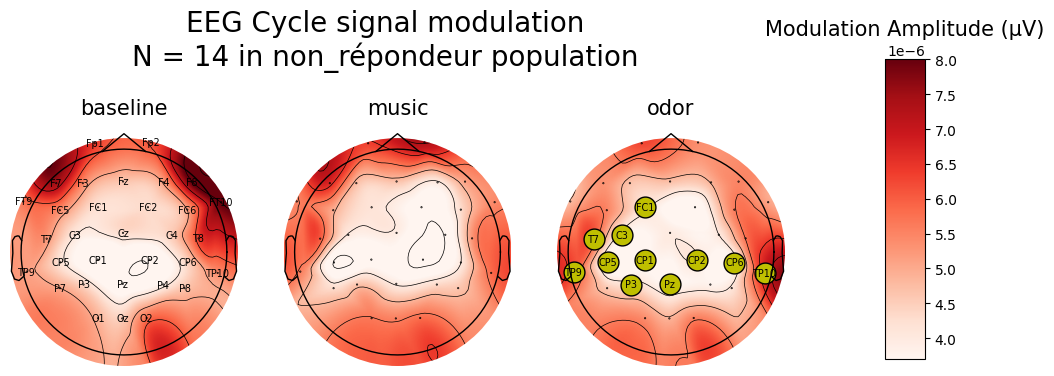

[(array([2]),), (array([9]),), (array([14]),), (array([23]),), (array([26]),), (array([28, 29]),)] [0.40527344 0.37792969 0.47070312 0.20996094 0.48046875 0.07128906]
[(array([4]),), (array([ 6,  7,  8,  9, 10, 11, 12, 13]),), (array([15, 16]),), (array([18]),), (array([20, 21, 22]),), (array([24, 25]),), (array([31]),)] [0.23535156 0.00488281 0.07617188 0.16894531 0.02246094 0.07910156
 0.20800781]


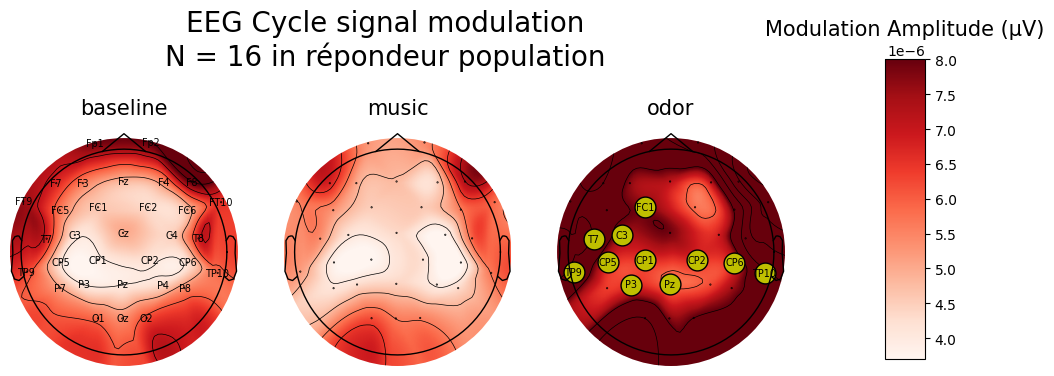

In [54]:
pos =get_pos()
df = neuro.copy()
def cluster_stats(x1,x2, chans, verbose = True):
    X = x2 - x1
    t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)
    
    if verbose:
        print(clusters, cluster_p_values)

    mask_signif_chans = np.full(len(ch_names), False)

    chan_inds_signif = []
    for cluster, p  in zip(clusters, cluster_p_values):
        if p < 0.05:
            chan_inds_signif.extend(list(cluster[0]))
    mask_signif_chans[chan_inds_signif] = True
    return  mask_signif_chans

metric = 'amplitude'

ch_names = df['chan'].unique()
da = gh.init_da({'session':df['session'].unique(), 'participant':df['participant'].unique(), 'chan':ch_names})
for ses in da['session'].values:
    for participant in da['participant'].values:
        for chan in da['chan'].values:
            da.loc[ses,participant,chan] = df.set_index(['session','participant','chan']).loc[(ses,participant,chan),metric]
            
q_diff = 0.05

mask_params = dict(markersize=15, markerfacecolor='y')

vmin = df.groupby(['session','chan']).median(numeric_only = True)[metric].quantile(q_diff)
vmax = df.groupby(['session','chan']).median(numeric_only = True)[metric].quantile(1 - q_diff)

for is_rep in neuro['is_répondeur'].unique():
    
    df_rep = df[df['is_répondeur'] == is_rep]

    N = df_rep['participant'].unique().size

    fig, axs = plt.subplots(ncols = df_rep['session'].unique().size, figsize = (10,5))
    fig.suptitle(f'EEG Cycle signal modulation\nN = {N} in {is_rep} population', fontsize = 20, y = 1)

    chans = da['chan'].values

    for c, session in enumerate(df_rep['session'].unique()):
        ax = axs[c]
        topo_data = df_rep[df_rep['session'] == session].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
        if session == 'baseline':
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax))
        else:
            x1 = da.sel(session = 'baseline').values
            x2 = da.sel(session = session).values
            mask = cluster_stats(x1,x2,chans)
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), mask = mask, mask_params = mask_params)
        ax.set_title(f'{session}', fontsize = 15)

    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0.3
    ax_y_height = 0.6
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('Modulation Amplitude (µV)',fontsize=15)

    fig.savefig(base_folder / 'Figures' / 'Autres' / f'neuro_modulation_in_{is_rep}.png', dpi = 500, bbox_inches = 'tight')

    plt.show()

<AxesSubplot: xlabel='session', ylabel='amplitude'>

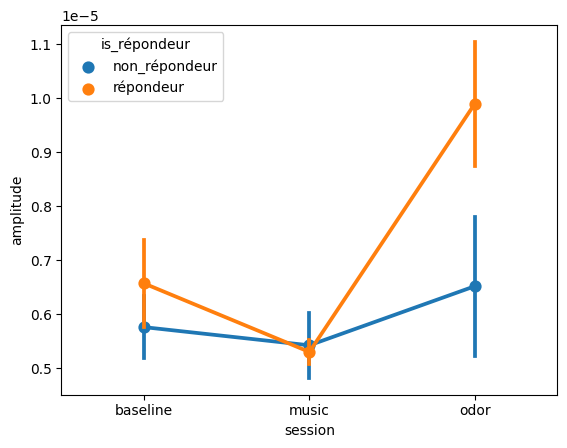

In [55]:
sns.pointplot(data = df.groupby(['participant','session','is_répondeur']).mean(True).reset_index(), x= 'session', hue = 'is_répondeur', y = 'amplitude', errorbar = "se")

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/pingouin/distribution.py:1006: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


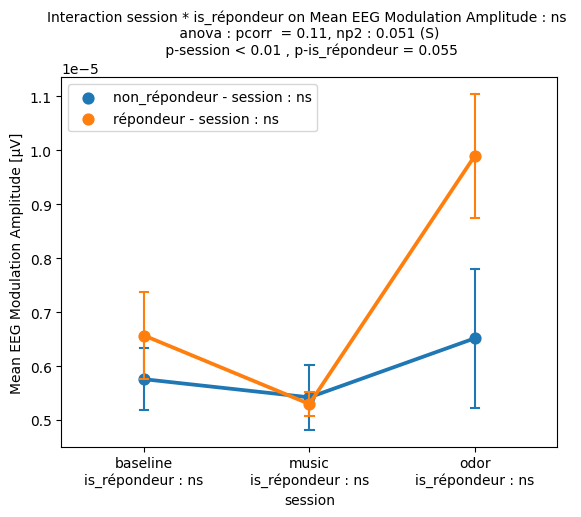

In [56]:
fig, ax = plt.subplots()

gh.auto_stats(df = df.groupby(['participant','session','is_répondeur']).mean(True).reset_index(),
              ax=ax,
              predictor = ['session','is_répondeur'],
              outcome = 'amplitude', 
              design = 'between',
              subject = 'participant',
              outcome_clean_label = 'Mean EEG Modulation Amplitude',
              outcome_unit = 'µV'
             )

fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_eeg_modulation.png', dpi = 500, bbox_inches = 'tight')

### PHASE FREQ

In [57]:
from compute_phase_freq import phase_freq_concat_job

In [58]:
concat = []
for chan in chans:
    concat.append(phase_freq_concat_job.get(chan)['phase_freq_concat'].sel(compress_cycle_mode = 0.75))


In [59]:
phase_freq = xr.concat(concat, dim = 'chan')
phase_freq = phase_freq.assign_coords({'chan':chans})

In [60]:
phase_freq

<xarray.DataArray 'phase_freq_concat' (chan: 32, participant: 30, session: 3,
                                       freq: 85, phase: 200)>
array([[[[[ 1.07138416e+00,  1.06985610e+00,  1.07795067e+00, ...,
            1.12739153e+00,  1.15309452e+00,  1.19652488e+00],
          [ 9.40071543e-01,  9.57202920e-01,  9.85400724e-01, ...,
            9.75602751e-01,  1.02269823e+00,  1.06191885e+00],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [ 9.15844745e-01,  9.36303841e-01,  9.84228414e-01, ...,
            1.09998437e+00,  1.01200112e+00,  1.06054156e+00],
          [ 1.05510224e+00,  1.06086463e+00,  1.01332415e+00, ...,
            1.16176883e+00,  1.12512441e+00,  1.08790384e+00],
          [ 9.21158084e-01,  8.76747233e-01,  9.81944630e-01, ...,
            1.23406013e+00,  1.10758234e+00,  9.56736042e-01]],

         [[ 5.22304746e+00,  5.28172940e+00,  5.25137100e+00, ...,
            5.44026047e+00,  5.33463637e+00,  5.26000808e+00],
          [ 5.83018263e+00,  5.89638522e+00,  5.78588295e+00, ...,
            5.39957235e+00,  5.49816047e+00,  5.61489913e+00],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
...
          [-5.46217160e-02,  4.01297074e-03,  7.03039203e-02, ...,
           -2.14879645e-02, -1.22045486e-02, -1.45268953e-04],
          [-6.70812041e-02, -1.22540694e-01,  4.04552565e-02, ...,
           -5.16966954e-02,  8.42857967e-03,  6.57211372e-02],
          [ 2.62660383e-03,  1.13238202e-01,  7.25888674e-02, ...,
            6.92885593e-02,  3.31096361e-02,  8.67695679e-02]],

         [[ 3.14439428e-01,  3.59623243e-01,  3.54593977e-01, ...,
            4.90543473e-01,  5.20396278e-01,  4.81211891e-01],
          [ 2.88135536e-01,  3.15931749e-01,  3.00073801e-01, ...,
            4.01136548e-01,  4.05186585e-01,  4.55665546e-01],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          ...,
          [ 5.33468685e-01,  4.13441078e-01,  4.20597180e-01, ...,
            2.96066915e-01,  3.66592671e-01,  4.86292021e-01],
          [ 6.53715519e-01,  5.99249106e-01,  6.31650070e-01, ...,
            5.42772883e-01,  5.77539855e-01,  5.37927898e-01],
          [ 7.73683682e-01,  7.20664829e-01,  7.89569632e-01, ...,
            6.58063602e-01,  5.60563681e-01,  7.38441150e-01]]]]])
Coordinates:
  * participant          (participant) object 'P01' 'P02' 'P03' ... 'P30' 'P31'
  * session              (session) object 'baseline' 'music' 'odor'
  * freq                 (freq) float64 4.0 4.098 4.199 ... 18.97 19.44 19.92
  * phase                (phase) float64 0.0 0.005025 0.01005 ... 0.995 1.0
    compress_cycle_mode  float64 0.75
  * chan                 (chan) object 'Fp1' 'Fz' 'F3' 'F7' ... 'F8' 'Fp2' 'Cz'

<AxesSubplot: xlabel='participant'>

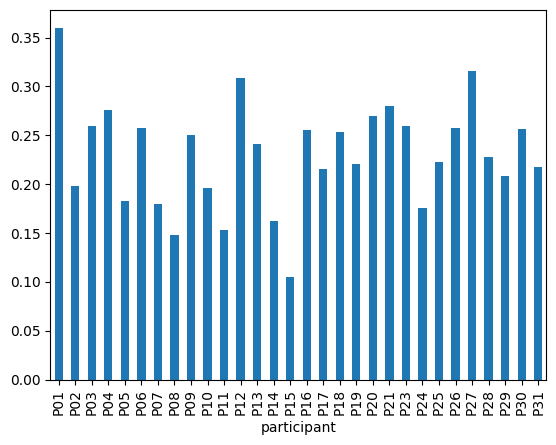

In [61]:
df_bis.groupby('participant').mean(True)['cycle_freq'].plot.bar()

In [62]:
pf = phase_freq_concat_job.get('CP2')['phase_freq_concat'].sel(compress_cycle_mode = 0.75)

In [63]:
phase_freq_redépondeurs = pf.sel(participant = repondeurs)
phase_freq_non_redépondeurs = pf.sel(participant = non_repondeurs)

In [64]:
pf_rep_no_rep = xr.concat([phase_freq_redépondeurs.mean('participant'), phase_freq_non_redépondeurs.mean('participant')], dim = 'is_répondeur')

In [65]:
pf_rep_no_rep = pf_rep_no_rep.assign_coords({'is_répondeur':['repondeurs','non_repondeurs']})

In [66]:
pf_rep_no_rep

<xarray.DataArray 'phase_freq_concat' (is_répondeur: 2, session: 3, freq: 67,
                                       phase: 200)>
array([[[[1.07840717, 1.07275323, 1.07682905, ..., 1.0233198 ,
          1.02506389, 1.07406328],
         [1.09759867, 1.07154468, 1.06381195, ..., 1.05311633,
          1.02778375, 1.0364751 ],
         [1.13886616, 1.1205035 , 1.1119182 , ..., 1.0657472 ,
          1.0849402 , 1.0849536 ],
         ...,
         [1.1755814 , 1.19024936, 1.16458248, ..., 1.13183492,
          1.18096578, 1.19337848],
         [1.15197748, 1.18502686, 1.13564014, ..., 1.13710529,
          1.12148908, 1.12295481],
         [1.09237837, 1.04284987, 1.07064784, ..., 1.11417205,
          1.13314225, 1.1226976 ]],

        [[1.12936456, 1.13293005, 1.11924558, ..., 1.14204375,
          1.15218473, 1.15160125],
         [1.16601471, 1.15660859, 1.15893989, ..., 1.13036815,
          1.13309127, 1.15056002],
         [1.21569867, 1.22600689, 1.21993717, ..., 1.20219111,
          1.17721087, 1.18690191],
...
         [1.91229746, 1.92600394, 1.99791842, ..., 1.90867558,
          1.97172294, 1.99632905],
         [1.91855037, 1.99436036, 2.00122181, ..., 1.92268163,
          1.88588995, 1.89959125],
         [1.95741676, 2.0241809 , 2.06241481, ..., 1.95438124,
          1.93767243, 1.91888126]],

        [[3.21870704, 3.20521526, 3.14573989, ..., 3.48319579,
          3.4313674 , 3.40999162],
         [3.35268763, 3.29210992, 3.24789443, ..., 3.61130533,
          3.53607784, 3.44202443],
         [3.31619664, 3.38544964, 3.36970449, ..., 3.56550071,
          3.58231314, 3.53232805],
         ...,
         [2.36164464, 2.35777146, 2.32460862, ..., 2.51097086,
          2.47963255, 2.37207241],
         [2.35061351, 2.3504907 , 2.39288042, ..., 2.43560756,
          2.4376426 , 2.42555988],
         [2.464478  , 2.44452027, 2.53988773, ..., 2.53812781,
          2.49285932, 2.48582376]]]])
Coordinates:
  * session              (session) object 'baseline' 'music' 'odor'
    compress_cycle_mode  float64 0.75
  * freq                 (freq) float64 4.0 4.098 4.199 ... 18.97 19.44 19.92
  * phase                (phase) float64 0.0 0.005025 0.01005 ... 0.995 1.0
  * is_répondeur         (is_répondeur) <U14 'repondeurs' 'non_repondeurs'

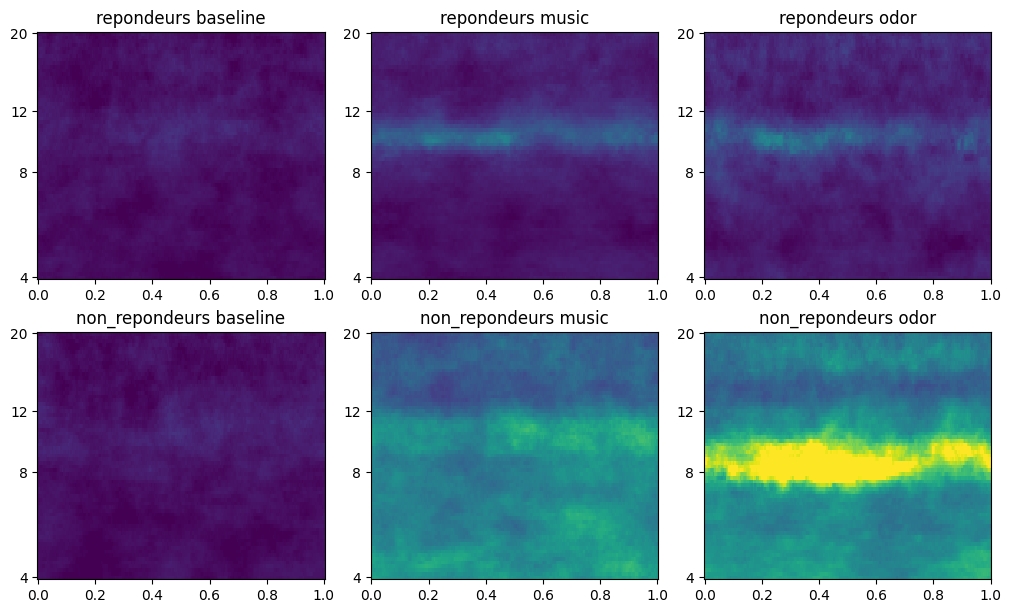

In [67]:
p = pf_rep_no_rep['phase'].values
f = pf_rep_no_rep['freq'].values

d = 0.01
vmin = pf_rep_no_rep.quantile(d)
vmax = pf_rep_no_rep.quantile(1-d)

yticks = [4, 8 , 12, 20]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10,6), constrained_layout = True)

for c, ses in enumerate(pf_rep_no_rep['session'].values):
    for r, rep in enumerate(pf_rep_no_rep['is_répondeur'].values):
        ax = axs[r,c]
        data = pf_rep_no_rep.loc[rep, ses,:,:].values
        ax.pcolormesh(p, f, data, vmin = vmin, vmax=vmax)
        ax.set_title(f'{rep} {ses}')
        ax.set_yscale('log')
        ax.set_yticks(yticks, labels = yticks)
        ax.minorticks_off()
fig.savefig(base_folder / 'Figures' / 'Autres' / 'effet_répondeurs_sur_eeg_alpha_modulation.png', dpi = 500, bbox_inches = 'tight')

## Delta resp freq to relaxation

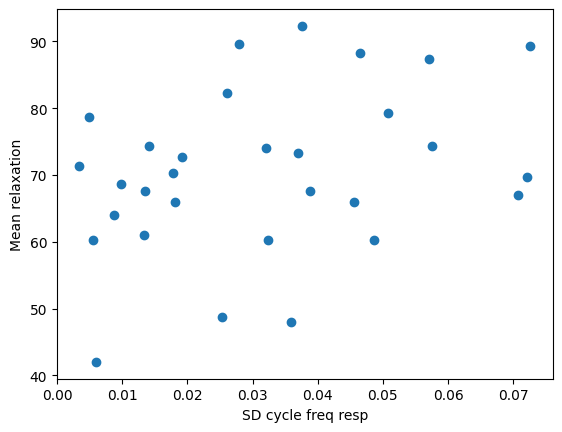

In [68]:
fig, ax = plt.subplots()
ax.scatter(df_bis.groupby('participant')['cycle_freq'].std(numeric_only = True),
           relaxation.groupby('participant')['Relaxation_intensity'].mean(numeric_only = True)
          )
ax.set_xlabel('SD cycle freq resp')
ax.set_ylabel('Mean relaxation')
fig.savefig(base_folder / 'Figures' / 'Autres' / 'variation_respi_to_relaxation.png', dpi = 500, bbox_inches = 'tight')
plt.show()